# Advertising Sales Channel Prediction

Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 
https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\ML Datasets\Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [6]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

# EDA 

<AxesSubplot:xlabel='TV', ylabel='sales'>

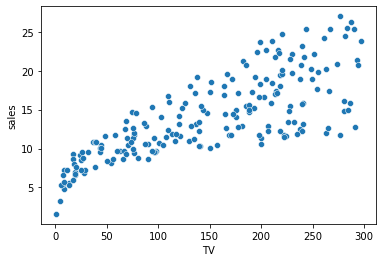

In [7]:
sns.scatterplot(data = df, x = 'TV', y = 'sales')

<AxesSubplot:xlabel='radio', ylabel='sales'>

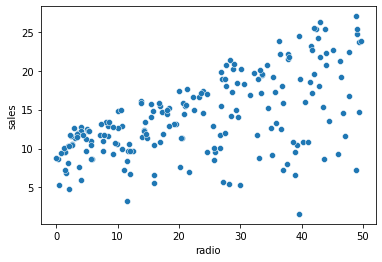

In [8]:
sns.scatterplot(data = df, x = 'radio', y = 'sales')

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

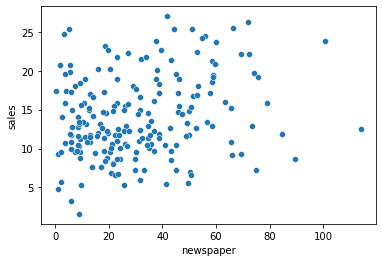

In [9]:
sns.scatterplot(data = df, x = 'newspaper', y = 'sales')

# Correlation

In [10]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

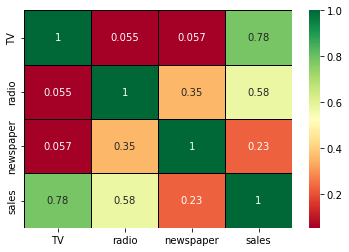

In [11]:
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'black', cmap = 'RdYlGn')

TV              AxesSubplot(0.125,0.749828;0.133621x0.130172)
radio        AxesSubplot(0.285345,0.749828;0.133621x0.130172)
newspaper     AxesSubplot(0.44569,0.749828;0.133621x0.130172)
sales        AxesSubplot(0.606034,0.749828;0.133621x0.130172)
dtype: object

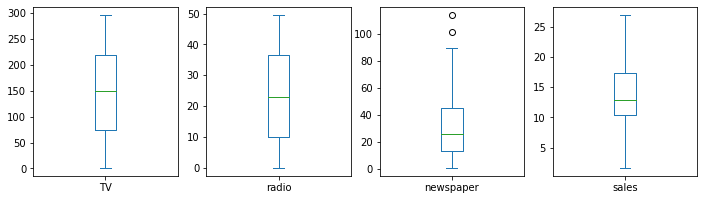

In [12]:
df.plot(kind = 'box', subplots = True, layout = (5,5) ,figsize=(15,18))

In [13]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

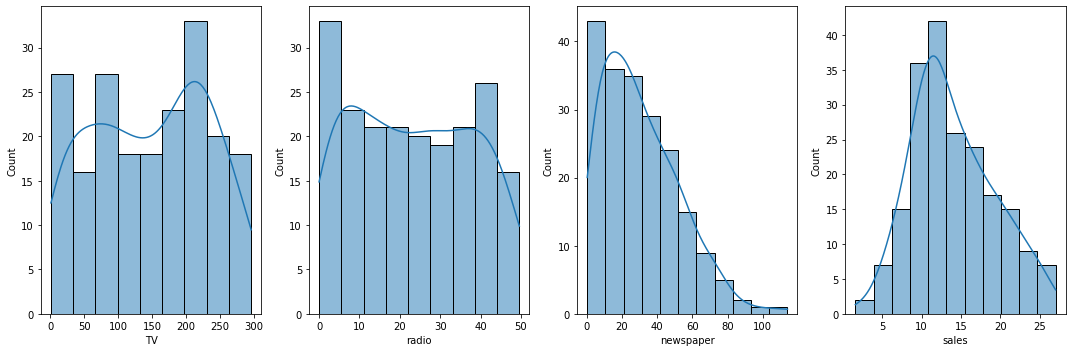

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15,5))
index = 0
ax = ax.flatten()

for col, value in df.items():
     if col!= 'type' :
        sns.histplot(data = df, x = col, ax = ax[index], kde = True)
        index +=1
plt.tight_layout()

In [15]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
X = df.drop(['sales'], axis = 1)
Y = df['sales']

In [17]:
from sklearn.preprocessing import power_transform
X = power_transform(X, method = 'yeo-johnson')
X

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [19]:
df = pd.DataFrame(df) 

# Train test split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [22]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=None)
cvs.mean()

MAE: 1.338217084337804
MSE: 2.720715065704028
RMSE: 1.649459022135448
r2score: 0.9138021136866258


0.8978060430607069

In [23]:
#DecisionTree Regressor model

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred=dtr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(dtr, X, Y, cv=None)
cvs.mean()

MAE: 0.9199999999999999
MSE: 1.607
RMSE: 1.267675037223657
r2score: 0.9490869128297534


0.9536188644012196

In [24]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
pred=rdr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(dtr, X, Y, cv=None)
cvs.mean()

MAE: 0.6122000000000007
MSE: 0.5048940500000016
RMSE: 0.7105589701073386
r2score: 0.9840039111515937


0.9608653900066226

In [25]:
#Support Vector Regressor model

from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,Y_train)
pred=svr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(svr, X, Y, cv=None)
cvs.mean()

MAE: 1.037648747061911
MSE: 2.4840205903370856
RMSE: 1.5760775965469103
r2score: 0.9213010847240078


0.9171386899137435

In [26]:
# KNN

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))
cvs = cross_val_score(knn, X, Y, cv=None)
cvs.mean()

MAE: 0.9043750000000002
MSE: 1.6661718750000005
RMSE: 1.2908028025225233
r2score: 0.9472122253189246


0.9401555621834634

# Hyperparameter Tuning

In [27]:
#RandomizedSCV

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['auto', "sqrt", 'log2']
max_depth    = [int(x) for x in np.linspace(3, 200, 10)]
min_samples_split = [2, 4, 10, 15]
min_samples_leaf  = [10, 20, 90, 150]

random_grid = {"n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
                "min_samples_split" : min_samples_split,
                "min_samples_leaf" : min_samples_leaf}
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 24, 46, 68, 90, 112, 134, 156, 178, 200], 'min_samples_split': [2, 4, 10, 15], 'min_samples_leaf': [10, 20, 90, 150]}


In [28]:
rf = RandomForestRegressor()
rscv = RandomizedSearchCV(estimator = rf,
                         param_distributions = random_grid,
                         verbose = 2,
                         cv = 10,
                         n_jobs = -1)

rscv.fit(X_train, Y_train)
rscv

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 24, 46, 68, 90, 112,
                                                      134, 156, 178, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 20, 90, 150],
                                        'min_samples_split': [2, 4, 10, 15],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   verbose=2)

In [29]:
rscv.best_estimator_

RandomForestRegressor(max_depth=134, max_features='auto', min_samples_leaf=10,
                      min_samples_split=10, n_estimators=52)

In [30]:
best_gscv = rscv.best_estimator_
pred = best_gscv.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('r2score:', r2_score(Y_test, pred))

#Cross validation
cvs = cross_val_score(rscv, X, Y, cv=10)
cvs.mean()

MAE: 0.98755955969742
MSE: 1.5472383017295352
RMSE: 1.2438803405993422
r2score: 0.9509802871629744
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


0.8802677258932539

In [31]:
import pickle
filename = 'Advertising Sales Channel Prediction.pkl'
pickle.dump(rf, open(filename, 'wb'))